In [1]:
%matplotlib notebook


import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display, clear_output, Markdown
import jupyros as jr
import rospy


#importing ros messages and services
import actionlib
from nav_msgs.msg import Odometry
from geometry_msgs.msg import Twist
from std_msgs.msg import String
from rt2_assignment1.srv import Command, CommandRequest
import rt2_assignment1.msg
import actionlib.msg
from matplotlib import animation, rc

#node initialization
rospy.init_node("widget_control")

#client user interface to play with the robot
global ui_client, act_client
ui_client = rospy.ServiceProxy('/user_interface', Command)

act_client = actionlib.SimpleActionClient('/reaching_goal',rt2_assignment1.msg.planningAction)
act_client.wait_for_server()

#publishing the velocity to move the robot
pub = rospy.Publisher('/cmd_vel', Twist, queue_size=1)
msg= Twist()







In [2]:
#start and stop buttons

button_start= widgets.Button(description="Start",
                             layout= widgets.Layout(width='50%', height='80px')) 
button_stop= widgets.Button(description="Stop",
                            layout= button_start.layout)

#call on action client to handle the action preemption


def on_start_clicked(_):
    global ui_
    ui_client= ("start")


def on_stop_clicked(_):
    ui_client= ("stop")
    act_client.cancel_goal()
    

#linking button and function together 
button_start.on_click(on_start_clicked)  
button_stop.on_click(on_stop_clicked)

display(button_start)
display(button_stop)
    

Button(description='Start', layout=Layout(height='80px', width='50%'), style=ButtonStyle())

Button(description='Stop', layout=Layout(height='80px', width='50%'), style=ButtonStyle())

In [3]:
#Sliders for setting linear and angular velocity

style = {'description_width': 'initial'}
linear= widgets.IntSlider(min=0, max=5, description= 'Set linear_v',style=style)
display(linear)

widgets.IntSlider()

angular= widgets.IntSlider(min=0, max=5, description= 'Set angular_v', style= style)
display(angular)

def set_linear():
    msg.linear.x
    pub.publish(msg)
    

def set_angular():
    msg.angular.z
    pub.publish(msg)

IntSlider(value=0, description='Set linear_v', max=5, style=SliderStyle(description_width='initial'))

IntSlider(value=0, description='Set angular_v', max=5, style=SliderStyle(description_width='initial'))

In [4]:
#Buttons to move the robot up, down, left, right and to stop it

forward= widgets.Button(description= "Forward",
                       layout= widgets.Layout(width='auto', height='auto'))
backward= widgets.Button(description = "Backward",
                        layout= widgets.Layout(width= 'auto', height='auto'))
right= widgets.Button(description = "Right",
                     layout= widgets.Layout(width='auto', height='auto'))
left= widgets.Button(description = "Left",
                    layout= widgets.Layout(width='auto', height='auto'))
stop = widgets.Button(description = "Stop",
                     layout= widgets.Layout(width='auto', height='auto'),button_style='danger')


def on_up_clicked(_):
    act_client.cancel_goal()
    msg.linear.x= linear.value
    msg.linear.z = 0
    pub.publish(msg)
    
    
def on_down_clicked(_):
    act_client.cancel_goal()
    msg.linear.x = -linear.value
    msg.linear.z =0
    pub.publish(msg)
    

def on_right_clicked(_):
    act_client.cancel_goal()
    msg.linear.x = 0
    msg.linear.z = angular.value
    pub.publish(msg)
    
    
def on_left_clicked(_):
    act_client.cancel_goal()
    msg.linear.x = 0
    msg.angular.z =-angular.value
    pub.publish(msg)
    
    
def on_stop_clicked(_):
    act_client.cancel_goal()
    msg.linear.x = 0
    msg.angular.z = 0
    pub.publish(msg)

    
    
forward.on_click(on_up_clicked)
backward.on_click(on_down_clicked)
right.on_click(on_right_clicked)
left.on_click(on_left_clicked)
stop.on_click(on_stop_clicked)

widgets.AppLayout(header= forward,
                 left_sidebar= left,
                 right_sidebar= right,
                 footer= backward,
                 center = stop,
                 grid_gap= '20px',
                 justify_items= 'center',
                 align_items = 'center')
               


AppLayout(children=(Button(description='Forward', layout=Layout(grid_area='header', height='auto', width='auto…

<IPython.core.display.Javascript object>


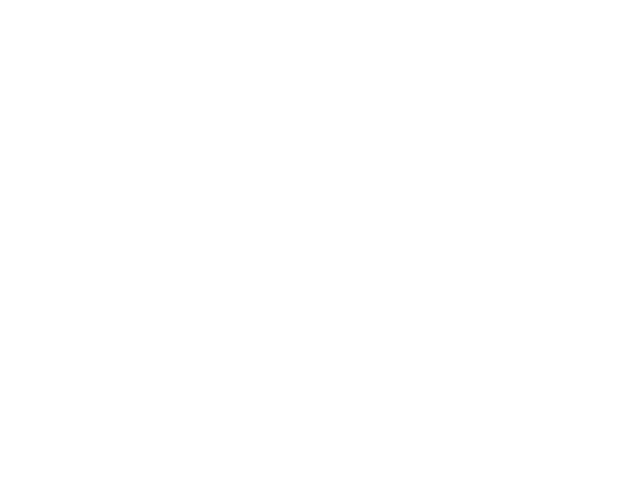

<IPython.core.display.Javascript object>


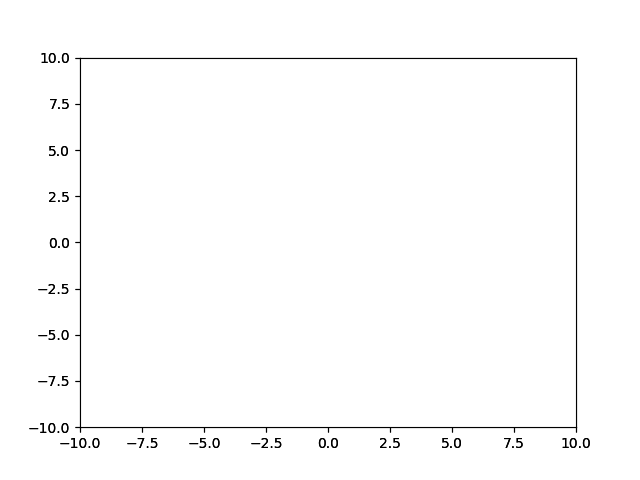

/tmp/ipykernel_61213/3014665617.py:77: UserWarning: frames=None which we can infer the length of, did not pass an explicit *save_count* and passed cache_frame_data=True.  To avoid a possibly unbounded cache, frame data caching has been disabled. To suppress this warning either pass `cache_frame_data=False` or `save_count=MAX_FRAMES`.
  anim = animation.FuncAnimation(fig1, func1,
/tmp/ipykernel_61213/3014665617.py:80: UserWarning: frames=None which we can infer the length of, did not pass an explicit *save_count* and passed cache_frame_data=True.  To avoid a possibly unbounded cache, frame data caching has been disabled. To suppress this warning either pass `cache_frame_data=False` or `save_count=MAX_FRAMES`.
  anim = animation.FuncAnimation(fig2, func2,


In [41]:
import rospy
import numpy as np
from nav_msgs.msg import Odometry
from geometry_msgs.msg import Twist
import matplotlib.pyplot as plt
from matplotlib import animation, rc



cmd_vel = Twist()
lin_vel_cmd = []
ang_vel_cmd = []

msg_odom = Odometry()
lin_vel_actual= []
ang_vel_actual = []

fig1= plt.figure()
fig2= plt.figure()

lin_axis = plt.axes(xlim =(-10, 10),
                ylim =(-10, 10))

ang_axis = plt.axes(xlim =(-10, 10),
                ylim =(-10, 10))

 
cmd_ang_line, = ang_axis.plot([], [], 'o')
odom_ang_line, = ang_axis.plot([], [], 'o')

cmd_lin_line, = lin_axis.plot([], [], 'o')
odom_lin_line, = lin_axis.plot([], [], 'o')

timestamp = np.arange(0, 10, 0.5).tolist()


def twist_callback(msg):
    cmd_vel.linear.x
    cmd_vel.angular.z
    lin_vel_cmd.append(cmd_vel.linear.x)
    ang_vel_cmd.append(cmd_vel.angular.z)
      
    
    
def odom_callback(msg):
    msg_odom.twist.twist.linear.x
    msg_odom.twist.twist.angular.z
    lin_vel_actual.append(msg_odom.twist.twist.linear.x)
    ang_vel_actual.append(msg_odom.twist.twist.angular.z)
    
    
def init1():
    cmd_ang_line.set_data([], [])
    odom_ang_line.set_data([], [])

def init2():
    cmd_lin_line.set_data([], [])
    odom_lin_line.set_data([], [])
    
    
    return cmd_ang_line


def func1():
    cmd_ang_line.set_data(timestamp, angular_vel_cmd)
    odom_ang_line.set_data(timestamp, angular_vel_actual)
    
    
def func2():
    cmd_lin_line.set_data(timestamp, lin_vel_cmd)
    odom_lin_line.set_data(timestamp, lin_vel_actual)
    
    

#Plotting data

anim = animation.FuncAnimation(fig1, func1,
                            init_func = init1)

anim = animation.FuncAnimation(fig2, func2,
                            init_func = init2)



sub_cmd = rospy.Subscriber("/cmd_vel", Twist, twist_callback)
sub_odom = rospy.Subscriber("/odom", Odometry, odom_callback)

<IPython.core.display.Javascript object>


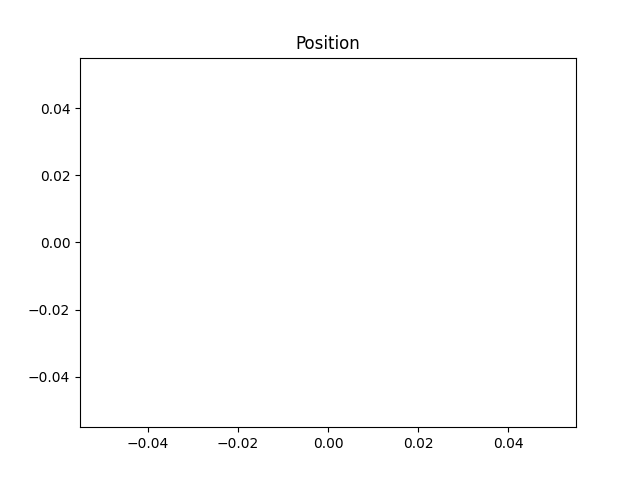

/tmp/ipykernel_61213/3981842717.py:37: UserWarning: frames=None which we can infer the length of, did not pass an explicit *save_count* and passed cache_frame_data=True.  To avoid a possibly unbounded cache, frame data caching has been disabled. To suppress this warning either pass `cache_frame_data=False` or `save_count=MAX_FRAMES`.
  animation.FuncAnimation(fig_pos, func, init_func = init)


In [20]:
import jupyros as jr
import rospy
from nav_msgs.msg import Odometry
from geometry_msgs.msg import Twist
import matplotlib.pyplot as plt
from matplotlib import animation
import matplotlib.pyplot as plt

#Plotting data
fig_pos = plt.figure()
ax = fig_pos.add_subplot()
line, = ax.plot([], [], 'o')
ax.set_title("Position")

#initializing as empty val
x_pos, y_pos = [], []

def init():
    line.set_data([],[])
    return line,


def odom_callback(msg):
    msg.pose.pose.position.x
    msg.pose.pose.position.y

    x_pos.append(msg.pose.pose.position.x)
    y_pos.append(msg.pose.pose.position.y)

def func():
    line.set_data(x_pos,y_pos)
    return line,


sub_pos= rospy.Subscriber("/odom", Odometry, odom_callback)

animation.FuncAnimation(fig_pos, func, init_func = init)